<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/CapKetereh/case_study1/Assignment_2_CapKetereh_cs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2 Case Study 1
###Title: Malaysia: Rainfall Indicators at Subnational Level
### Group: CapKetereh

### About Data

This dataset contains dekadal rainfall indicators computed from Climate Hazards Group InfraRed Precipitation satellite imagery with insitu Station data (CHIRPS) version 2, aggregated by subnational administrative units.

Included indicators are (for each dekad):

* 10 day rainfall [mm] (rfh)
* rainfall 1-month rolling aggregation [mm] (r1h)
* rainfall 3-month rolling aggregation [mm] (r3h)
* rainfall long term average [mm] (rfh_avg)
* rainfall 1-month rolling aggregation long term average [mm] (r1h_avg)
* rainfall 3-month rolling aggregation long term average [mm] (r3h_avg)
* rainfall anomaly [%] (rfq)
* rainfall 1-month anomaly [%] (r1q)
* rainfall 3-month anomaly [%] (r3q)

### Data Preparation and Cleansing

#### 1. Import the necessary data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/KHUCHIN2.csv"
df = pd.read_csv(path)
df

<ipython-input-11-a02eec80ca12>:2: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


date   adm2_id  ADM2_PCODE                 n_pixels  \
0            #date  #adm2+id  #adm2+code  #indicator+n_pixels+num   
1       1981-01-01     37433      MY1308                     88.0   
2       1981-01-11     37433      MY1308                     88.0   
3       1981-01-21     37433      MY1308                     88.0   
4       1981-02-01     37433      MY1308                     88.0   
...            ...       ...         ...                      ...   
203408  2023-09-01     37403      MY1104                      6.0   
203409  2023-09-11     37403      MY1104                      6.0   
203410  2023-09-21     37403      MY1104                      6.0   
203411  2023-10-01     37403      MY1104                      6.0   
203412  2023-10-11     37403      MY1104                      6.0   

                       rfh                 rfh_avg                 r1h  \
0       #indicator+rfh+num  #indicator+rfh_avg+num  #indicator+r1h+num   
1                  179.625                148.8826                 NaN   
2                 118.8409                139.0057                 NaN   
3                  36.2614                160.2913            334.7273   
4                 213.9432                 136.317            369.0455   
...                    ...                     ...                 ...   
203408             66.1667                 96.9833            200.6667   
203409             58.1667                102.8167            191.1667   
203410            114.6667                102.0333               239.0   
203411             58.3333                126.0556            231.1667   
203412            133.3333                122.9167            306.3333   

                       r1h_avg                 r3h                 r3h_avg  \
0       #indicator+r1h_avg+num  #indicator+r3h+num  #indicator+r3h_avg+num   
1                          NaN                 NaN                     NaN   
2                          NaN                 NaN                     NaN   
3                     448.1795                 NaN                     NaN   
4                      435.614                 NaN                     NaN   
...                        ...                 ...                     ...   
203408                275.4722               571.0                650.5667   
203409                307.7278            594.1667                704.2833   
203410                301.8333            657.1667                757.0667   
203411                330.9056            642.6667                816.5556   
203412                351.0056            699.8333                868.9556   

                       rfq                 r1q                 r3q  version  
0       #indicator+rfq+pct  #indicator+r1q+pct  #indicator+r3q+pct  #status  
1                 119.9778                 NaN                 NaN    final  
2                  85.9972                 NaN                 NaN    final  
3                  24.9628             75.2385                 NaN    final  
4                 154.9305             85.0614                 NaN    final  
...                    ...                 ...                 ...      ...  
203408             69.7826             73.7959             87.9548    final  
203409             58.5871             63.3142             84.5836    final  
203410            111.8032             79.8503             86.9764    final  
203411             48.3256              70.743             78.9622   prelim  
203412            108.1433             87.6256             80.7587   prelim  

[203413 rows x 14 columns]

Filter dataset into year 2000 above

In [ ]:
# Drop the first row by index
df = df.drop(index=df.index[0])
df

date adm2_id ADM2_PCODE n_pixels       rfh   rfh_avg       r1h  \
1       1981-01-01   37433     MY1308     88.0   179.625  148.8826       NaN   
2       1981-01-11   37433     MY1308     88.0  118.8409  139.0057       NaN   
3       1981-01-21   37433     MY1308     88.0   36.2614  160.2913  334.7273   
4       1981-02-01   37433     MY1308     88.0  213.9432   136.317  369.0455   
5       1981-02-11   37433     MY1308     88.0   31.6705  126.6095   281.875   
...            ...     ...        ...      ...       ...       ...       ...   
203408  2023-09-01   37403     MY1104      6.0   66.1667   96.9833  200.6667   
203409  2023-09-11   37403     MY1104      6.0   58.1667  102.8167  191.1667   
203410  2023-09-21   37403     MY1104      6.0  114.6667  102.0333     239.0   
203411  2023-10-01   37403     MY1104      6.0   58.3333  126.0556  231.1667   
203412  2023-10-11   37403     MY1104      6.0  133.3333  122.9167  306.3333   

         r1h_avg       r3h   r3h_avg       rfq      r1q      r3q version  
1            NaN       NaN       NaN  119.9778      NaN      NaN   final  
2            NaN       NaN       NaN   85.9972      NaN      NaN   final  
3       448.1795       NaN       NaN   24.9628  75.2385      NaN   final  
4        435.614       NaN       NaN  154.9305  85.0614      NaN   final  
5       423.2178       NaN       NaN   27.8631  67.3737      NaN   final  
...          ...       ...       ...       ...      ...      ...     ...  
203408  275.4722     571.0  650.5667   69.7826  73.7959  87.9548   final  
203409  307.7278  594.1667  704.2833   58.5871  63.3142  84.5836   final  
203410  301.8333  657.1667  757.0667  111.8032  79.8503  86.9764   final  
203411  330.9056  642.6667  816.5556   48.3256   70.743  78.9622  prelim  
203412  351.0056  699.8333  868.9556  108.1433  87.6256  80.7587  prelim  

[203412 rows x 14 columns]

In [ ]:
#Change the variable date data type into datetime data type
df['date'] = pd.to_datetime(df['date'])

# Create a boolean condition to filter rows based on the year
condition = df['date'].dt.year >= 2000

# Apply the condition to the DataFrame to keep only rows with date >= 2000
df = df[condition]

#Show the dataset
df

date adm2_id ADM2_PCODE n_pixels       rfh   rfh_avg       r1h  \
685    2000-01-01   37433     MY1308     88.0  215.5455  148.8826     475.0   
686    2000-01-11   37433     MY1308     88.0  109.4318  139.0057  491.7159   
687    2000-01-21   37433     MY1308     88.0  293.1705  160.2913  618.1477   
688    2000-02-01   37433     MY1308     88.0  142.5341   136.317  545.1364   
689    2000-02-11   37433     MY1308     88.0  122.2955  126.6095     558.0   
...           ...     ...        ...      ...       ...       ...       ...   
203408 2023-09-01   37403     MY1104      6.0   66.1667   96.9833  200.6667   
203409 2023-09-11   37403     MY1104      6.0   58.1667  102.8167  191.1667   
203410 2023-09-21   37403     MY1104      6.0  114.6667  102.0333     239.0   
203411 2023-10-01   37403     MY1104      6.0   58.3333  126.0556  231.1667   
203412 2023-10-11   37403     MY1104      6.0  133.3333  122.9167  306.3333   

         r1h_avg        r3h    r3h_avg       rfq       r1q       r3q version  
685     440.9178  1318.0795  1185.5913  143.3206  107.5584  111.0814   final  
686     457.6807  1322.4886  1228.6981   79.4634  107.2774  107.5717   final  
687     448.1795  1435.6591  1258.2777  180.3909  137.0964   113.986   final  
688      435.614  1460.9659  1277.1402  104.3994  124.5779  114.2817   final  
689     423.2178  1422.6591  1273.0288   96.7221  131.1119  111.6623   final  
...          ...        ...        ...       ...       ...       ...     ...  
203408  275.4722      571.0   650.5667   69.7826   73.7959   87.9548   final  
203409  307.7278   594.1667   704.2833   58.5871   63.3142   84.5836   final  
203410  301.8333   657.1667   757.0667  111.8032   79.8503   86.9764   final  
203411  330.9056   642.6667   816.5556   48.3256    70.743   78.9622  prelim  
203412  351.0056   699.8333   868.9556  108.1433   87.6256   80.7587  prelim  

[113124 rows x 14 columns]

#### 2. List the info of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 685 to 203412
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        113124 non-null  datetime64[ns]
 1   adm2_id     113124 non-null  object        
 2   ADM2_PCODE  113124 non-null  object        
 3   n_pixels    113124 non-null  object        
 4   rfh         113124 non-null  object        
 5   rfh_avg     113124 non-null  object        
 6   r1h         113124 non-null  object        
 7   r1h_avg     113124 non-null  object        
 8   r3h         113124 non-null  object        
 9   r3h_avg     113124 non-null  object        
 10  rfq         113124 non-null  object        
 11  r1q         113124 non-null  object        
 12  r3q         113124 non-null  object        
 13  version     113124 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 12.9+ MB


#### 3. Check for the missing values

In [ ]:
print(df.isnull().sum())

date          0
adm2_id       0
ADM2_PCODE    0
n_pixels      0
rfh           0
rfh_avg       0
r1h           0
r1h_avg       0
r3h           0
r3h_avg       0
rfq           0
r1q           0
r3q           0
version       0
dtype: int64


#### 4. Check for duplicates

In [ ]:
print(df.duplicated().sum())

0


#### 5. Change the datatype from object to numeric

In [ ]:
numeric_columns = ['n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

<ipython-input-17-3f2a501acb58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 685 to 203412
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        113124 non-null  datetime64[ns]
 1   adm2_id     113124 non-null  object        
 2   ADM2_PCODE  113124 non-null  object        
 3   n_pixels    113124 non-null  float64       
 4   rfh         113124 non-null  float64       
 5   rfh_avg     113124 non-null  float64       
 6   r1h         113124 non-null  float64       
 7   r1h_avg     113124 non-null  float64       
 8   r3h         113124 non-null  float64       
 9   r3h_avg     113124 non-null  float64       
 10  rfq         113124 non-null  float64       
 11  r1q         113124 non-null  float64       
 12  r3q         113124 non-null  float64       
 13  version     113124 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 12.9+ MB


#### 6. Fill in the missing values with mean values

In [ ]:
df['r1h'].fillna(df['r1h'].mean(), inplace=True)
df['r1h_avg'].fillna(df['r1h_avg'].mean(), inplace=True)
df['r3h'].fillna(df['r3h'].mean(), inplace=True)
df['r3h_avg'].fillna(df['r3h_avg'].mean(), inplace=True)

<ipython-input-19-da652b300bee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['r1h'].fillna(df['r1h'].mean(), inplace=True)
<ipython-input-19-da652b300bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['r1h_avg'].fillna(df['r1h_avg'].mean(), inplace=True)
<ipython-input-19-da652b300bee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['r3h'].fillna(df['r3h'].mean(), inplace=True)
<ipython-input-19-da652b300bee>:4: Settin

#### 6. Save cleaned data

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df2 = pd.read_csv('cleaned_data.csv')
df2

date  adm2_id ADM2_PCODE  n_pixels       rfh   rfh_avg  \
0       2000-01-01    37433     MY1308      88.0  215.5455  148.8826   
1       2000-01-11    37433     MY1308      88.0  109.4318  139.0057   
2       2000-01-21    37433     MY1308      88.0  293.1705  160.2913   
3       2000-02-01    37433     MY1308      88.0  142.5341  136.3170   
4       2000-02-11    37433     MY1308      88.0  122.2955  126.6095   
...            ...      ...        ...       ...       ...       ...   
113119  2023-09-01    37403     MY1104       6.0   66.1667   96.9833   
113120  2023-09-11    37403     MY1104       6.0   58.1667  102.8167   
113121  2023-09-21    37403     MY1104       6.0  114.6667  102.0333   
113122  2023-10-01    37403     MY1104       6.0   58.3333  126.0556   
113123  2023-10-11    37403     MY1104       6.0  133.3333  122.9167   

             r1h   r1h_avg        r3h    r3h_avg       rfq       r1q  \
0       475.0000  440.9178  1318.0795  1185.5913  143.3206  107.5584   
1       491.7159  457.6807  1322.4886  1228.6981   79.4634  107.2774   
2       618.1477  448.1795  1435.6591  1258.2777  180.3909  137.0964   
3       545.1364  435.6140  1460.9659  1277.1402  104.3994  124.5779   
4       558.0000  423.2178  1422.6591  1273.0288   96.7221  131.1119   
...          ...       ...        ...        ...       ...       ...   
113119  200.6667  275.4722   571.0000   650.5667   69.7826   73.7959   
113120  191.1667  307.7278   594.1667   704.2833   58.5871   63.3142   
113121  239.0000  301.8333   657.1667   757.0667  111.8032   79.8503   
113122  231.1667  330.9056   642.6667   816.5556   48.3256   70.7430   
113123  306.3333  351.0056   699.8333   868.9556  108.1433   87.6256   

             r3q version  
0       111.0814   final  
1       107.5717   final  
2       113.9860   final  
3       114.2817   final  
4       111.6623   final  
...          ...     ...  
113119   87.9548   final  
113120   84.5836   final  
113121   86.9764   final  
113122   78.9622  prelim  
113123   80.7587  prelim  

[113124 rows x 14 columns]

In [ ]:
df2.describe(include='all')

date        adm2_id ADM2_PCODE       n_pixels            rfh  \
count       113124  113124.000000     113124  113124.000000  113124.000000   
unique         857            NaN        130            NaN            NaN   
top     2000-01-01            NaN     MY1307            NaN            NaN   
freq           132            NaN       2571            NaN            NaN   
mean           NaN   37403.393939        NaN      81.159091      85.131367   
std            NaN      38.269303        NaN     110.252803      59.129427   
min            NaN   37337.000000        NaN       5.000000       1.000000   
25%            NaN   37370.750000        NaN      22.000000      47.321175   
50%            NaN   37403.500000        NaN      46.500000      74.910050   
75%            NaN   37436.250000        NaN      89.500000     109.555825   
max            NaN   37469.000000        NaN     688.000000     761.491400   

              rfh_avg            r1h        r1h_avg            r3h  \
count   113124.000000  113124.000000  113124.000000  113124.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        82.249415     255.451706     246.845685     767.989287   
std         36.758801     138.342813     104.262660     316.994322   
min          9.497800       4.266700      33.908900      38.200000   
25%         57.613500     168.109925     175.479800     553.851825   
50%         75.508900     233.035450     226.901600     717.301400   
75%         98.940900     316.750000     295.246500     925.889950   
max        302.419300    1616.066700     865.724000    2909.300000   

              r3h_avg            rfq            r1q            r3q version  
count   113124.000000  113124.000000  113124.000000  113124.000000  113124  
unique            NaN            NaN            NaN            NaN       2  
top               NaN            NaN            NaN            NaN   final  
freq              NaN            NaN            NaN            NaN  112860  
mean       741.590252     103.866687     103.812645     103.794261     NaN  
std        261.457818      53.863662      37.224833      24.305190     NaN  
min        153.817800       2.870400       6.351000       9.994200     NaN  
25%        549.162200      70.062575      82.646875      90.678000     NaN  
50%        688.388000      97.177500     101.019500     102.331450     NaN  
75%        878.350900     127.626875     120.002450     114.895475     NaN  
max       1911.377300     670.965800     564.587900     301.658200     NaN

### Perform exploratory analysis & visualization

#### Compute the mean, sum, range and other interesting statistics for numeric columns

In [ ]:
df2[['n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q']].describe()


n_pixels            rfh        rfh_avg            r1h  \
count  113124.000000  113124.000000  113124.000000  113124.000000   
mean       81.159091      85.131367      82.249415     255.451706   
std       110.252803      59.129427      36.758801     138.342813   
min         5.000000       1.000000       9.497800       4.266700   
25%        22.000000      47.321175      57.613500     168.109925   
50%        46.500000      74.910050      75.508900     233.035450   
75%        89.500000     109.555825      98.940900     316.750000   
max       688.000000     761.491400     302.419300    1616.066700   

             r1h_avg            r3h        r3h_avg            rfq  \
count  113124.000000  113124.000000  113124.000000  113124.000000   
mean      246.845685     767.989287     741.590252     103.866687   
std       104.262660     316.994322     261.457818      53.863662   
min        33.908900      38.200000     153.817800       2.870400   
25%       175.479800     553.851825     549.162200      70.062575   
50%       226.901600     717.301400     688.388000      97.177500   
75%       295.246500     925.889950     878.350900     127.626875   
max       865.724000    2909.300000    1911.377300     670.965800   

                 r1q            r3q  
count  113124.000000  113124.000000  
mean      103.812645     103.794261  
std        37.224833      24.305190  
min         6.351000       9.994200  
25%        82.646875      90.678000  
50%       101.019500     102.331450  
75%       120.002450     114.895475  
max       564.587900     301.658200

#### Explore distributions of numeric columns using histograms etc.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
numeric_columns = ['n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q']

In [ ]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

<ipython-input-26-6053ef296936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


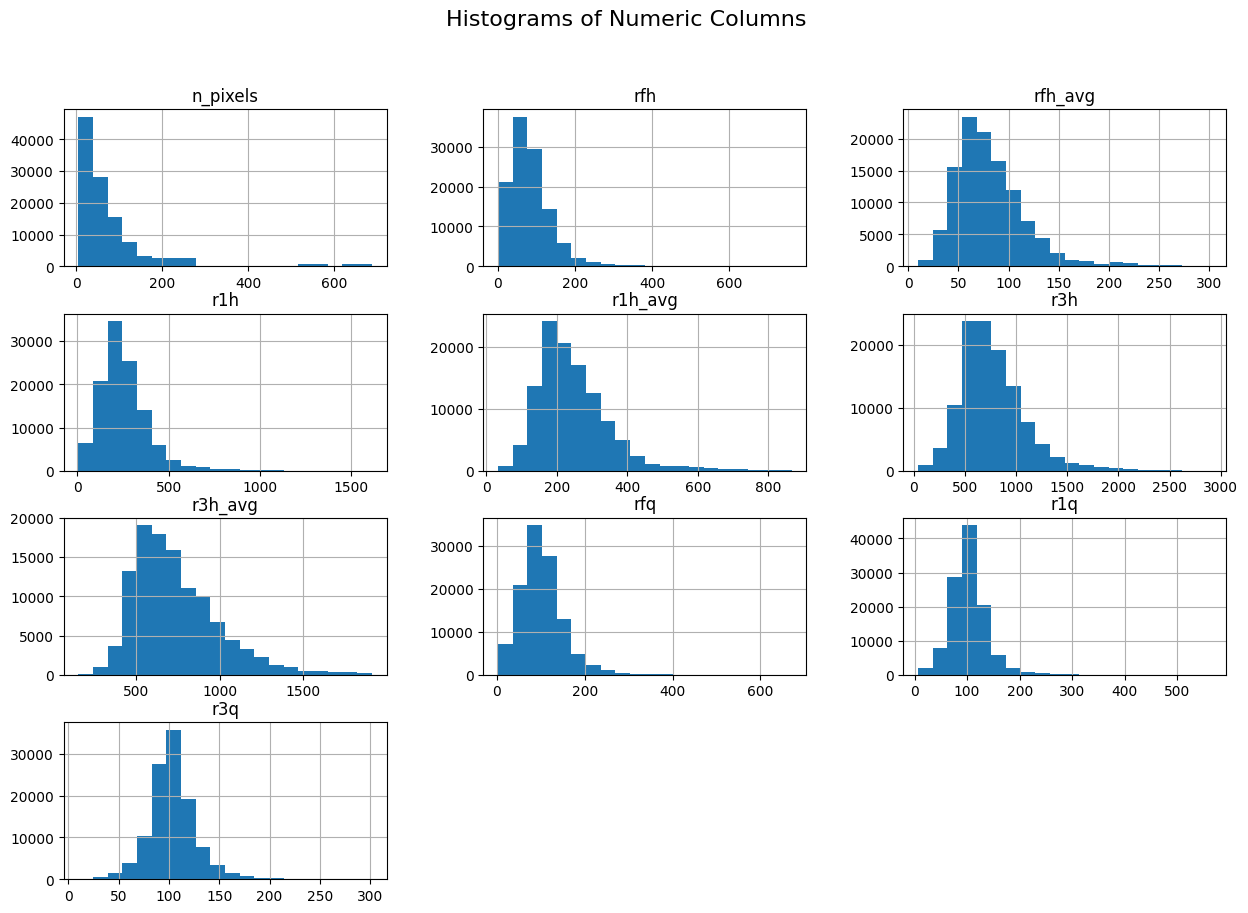

In [ ]:
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.show()

#### Explore relationship between columns using scatter plots, bar charts etc.

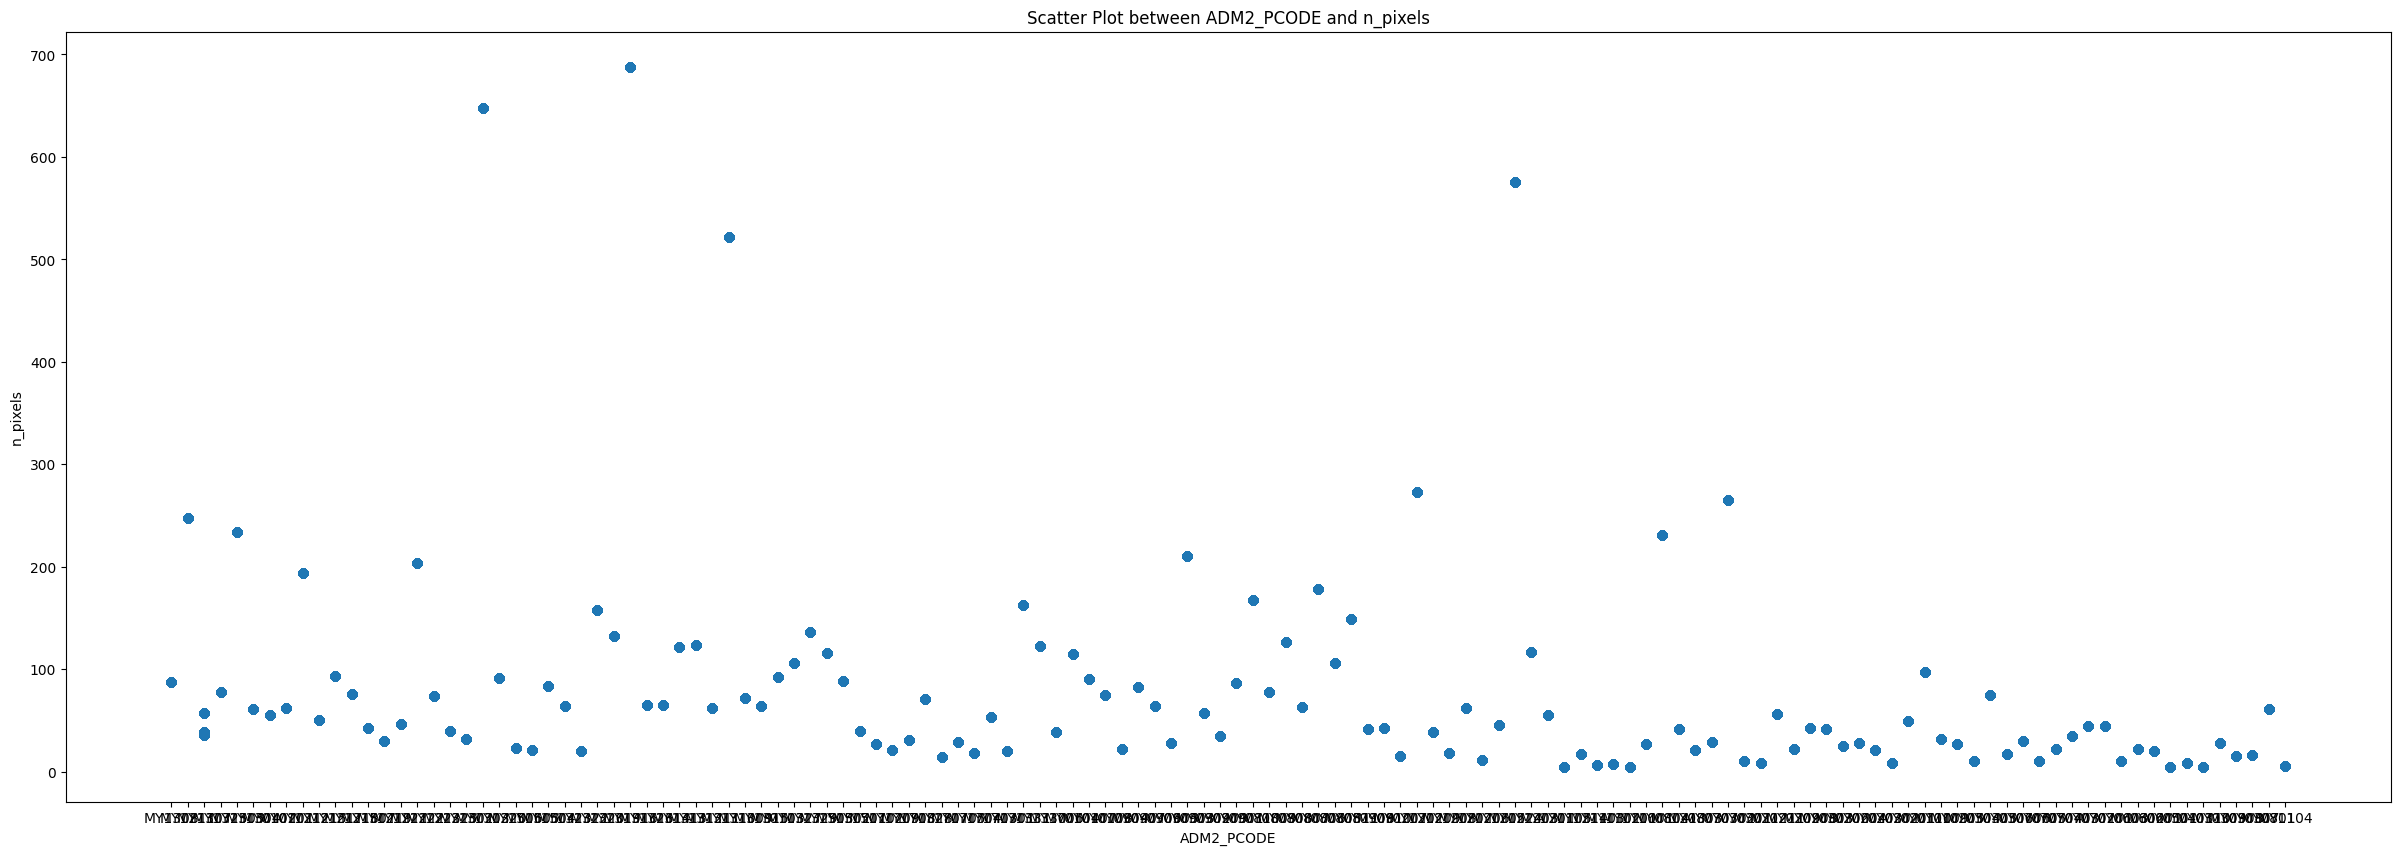

In [ ]:
plt.figure(figsize=(30, 10))
plt.scatter(df['ADM2_PCODE'], df['n_pixels'])
plt.title('Scatter Plot between ADM2_PCODE and n_pixels')
plt.xlabel('ADM2_PCODE')
plt.ylabel('n_pixels')
plt.show()

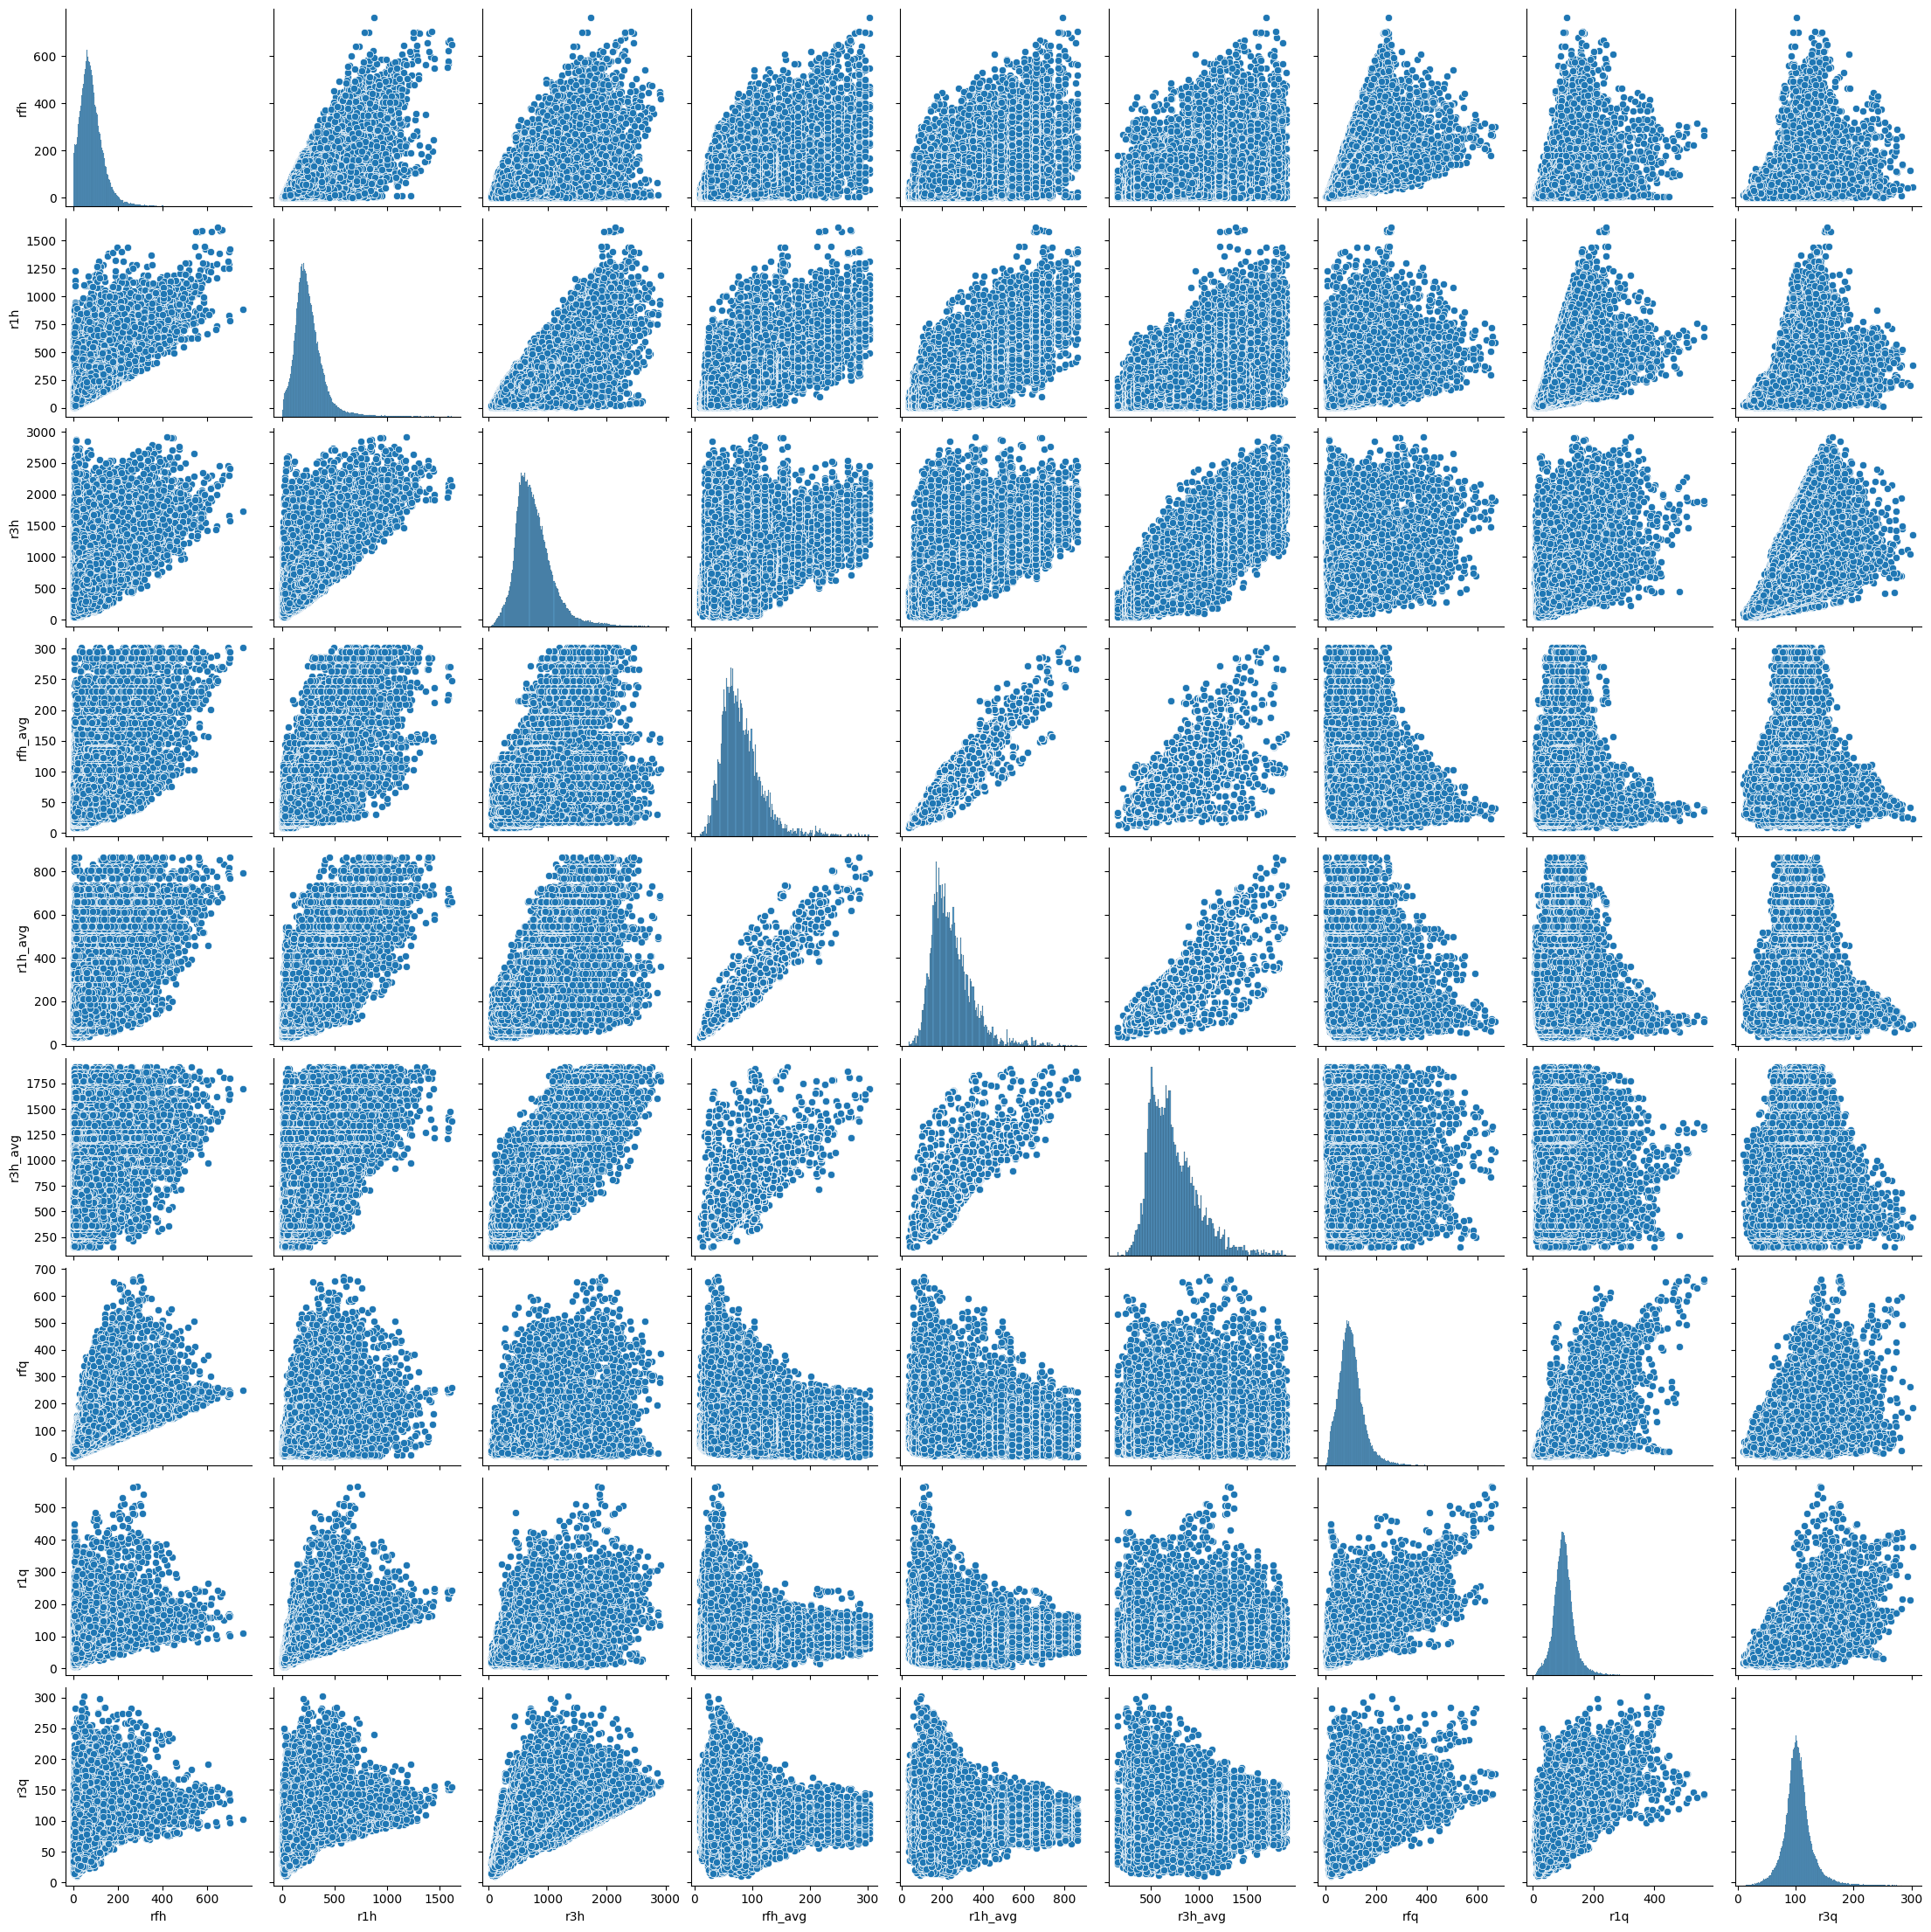

In [ ]:
import seaborn as sns
sns.pairplot(df[['rfh', 'r1h', 'r3h', 'rfh_avg', 'r1h_avg', 'r3h_avg', 'rfq', 'r1q', 'r3q']])
plt.show()

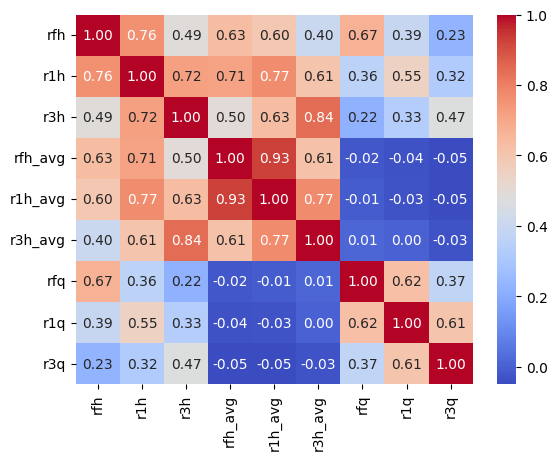

In [ ]:
corr_matrix = df[['rfh', 'r1h', 'r3h', 'rfh_avg', 'r1h_avg', 'r3h_avg', 'rfq', 'r1q', 'r3q']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

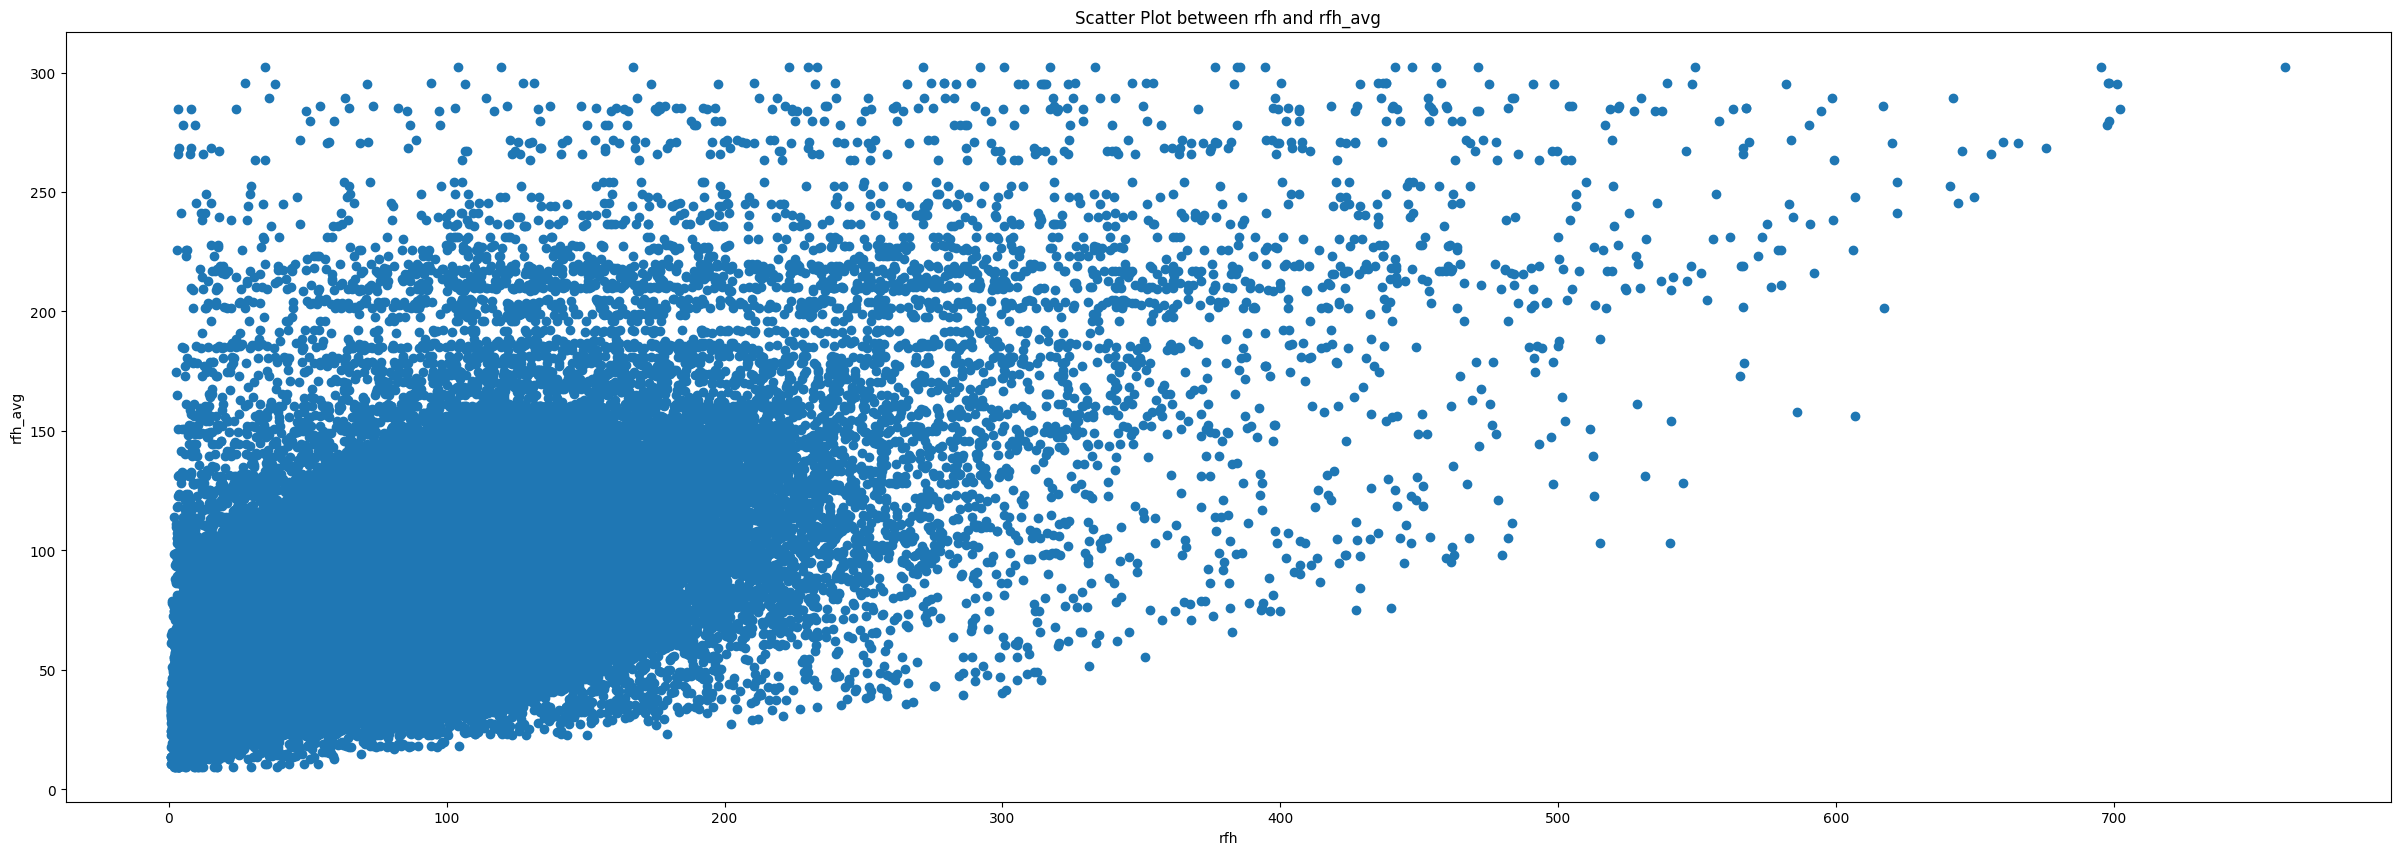

In [ ]:
plt.figure(figsize=(30, 10))
plt.scatter(df['rfh'], df['rfh_avg'])
plt.title('Scatter Plot between rfh and rfh_avg')
plt.xlabel('rfh')
plt.ylabel('rfh_avg')
plt.show()

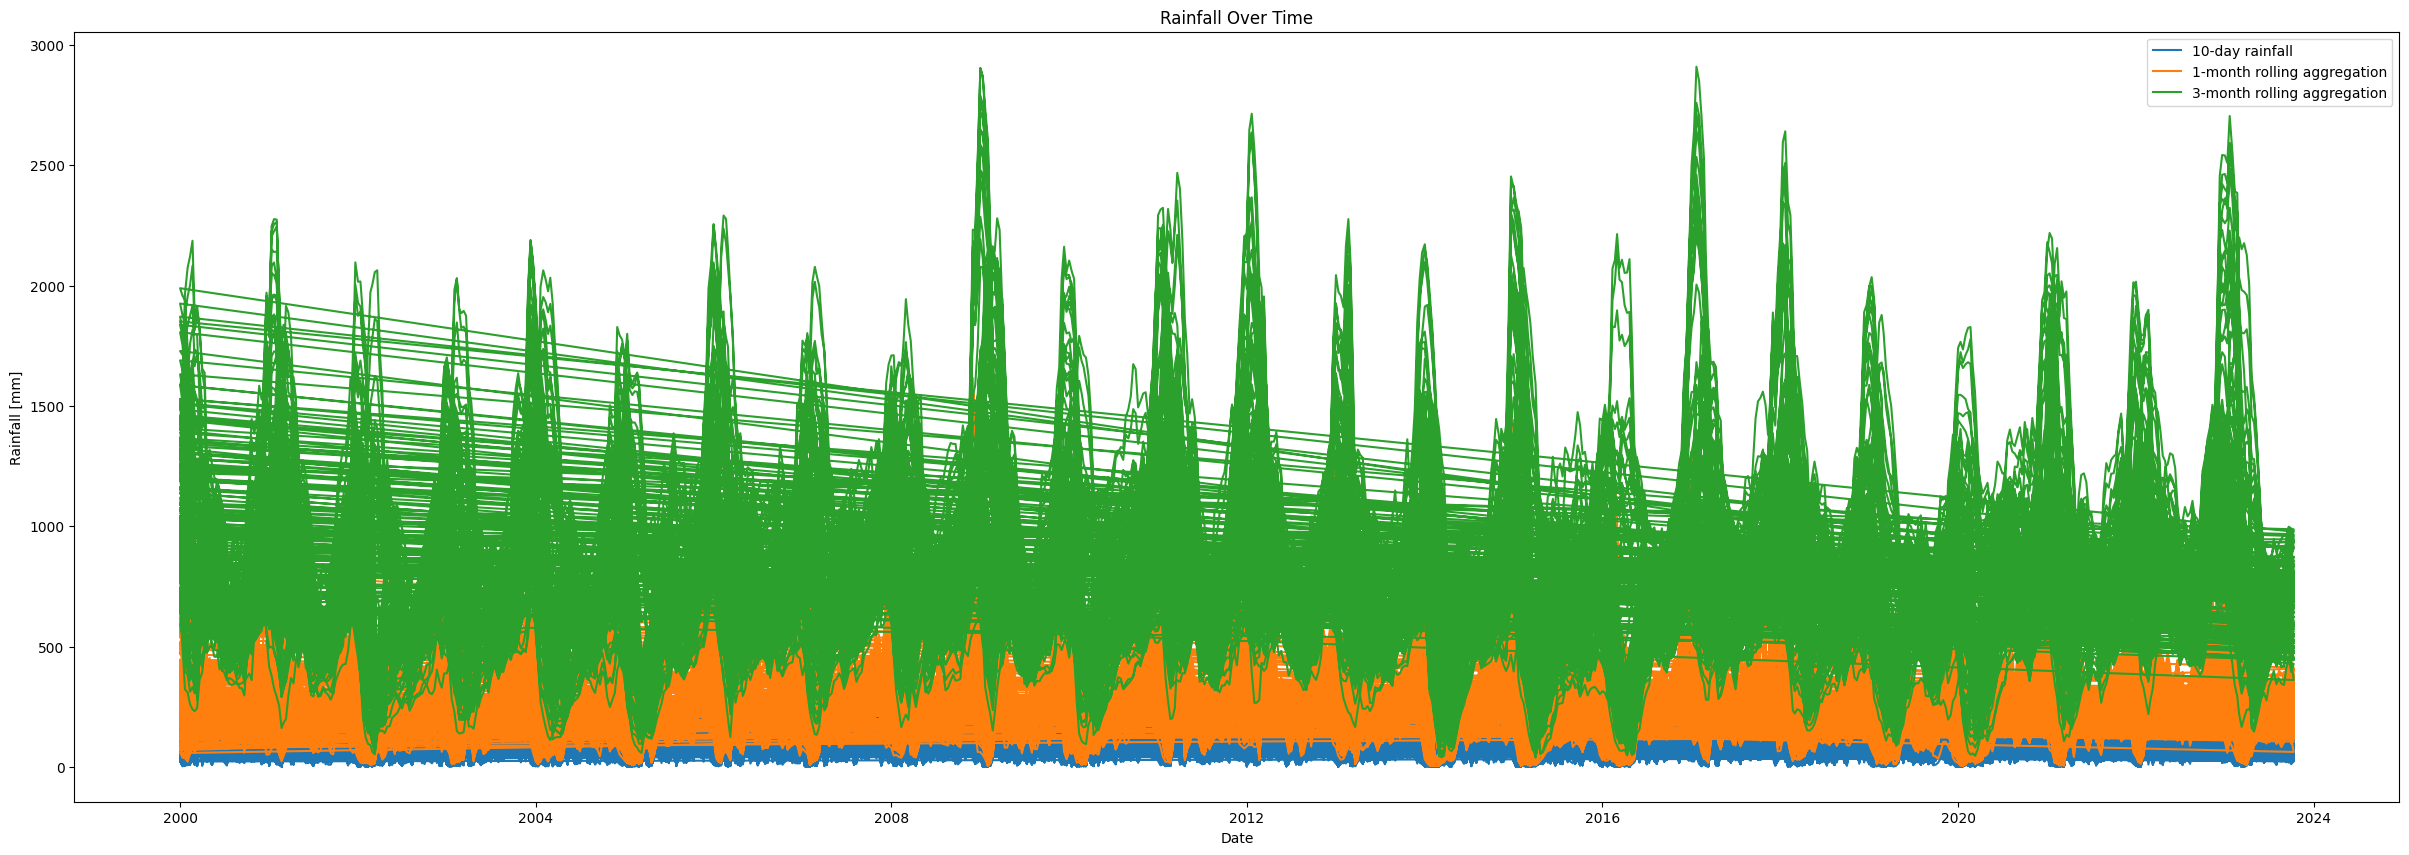

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(df['date'], df['rfh'], label='10-day rainfall')
plt.plot(df['date'], df['r1h'], label='1-month rolling aggregation')
plt.plot(df['date'], df['r3h'], label='3-month rolling aggregation')
plt.legend()
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall [mm]')
plt.show()


### Ask & answer questions about the data

In this section, our group will be using library function from Pandas annd Matplotlib to answer the question

* **Pandas** --> Pandas is the most famous software libraries of Python mostly used for data analytics task in Python. Pandas works well with numeric, alphabetic, and heterogeneous data types at the same time. We used Pandas to import, filter, clean, and visulize dataset.
* **Matplotlib** --> Matplotlib is a powerful tool for performing a wide range of tasks. It can generate various visualization reports such as line plots, scatter plots, histograms, bar charts, pie charts, box plots, and many more. This library also allows for three-dimensional plotting.
* **Seaborn** --> Seaborn is an amazing Python visualization library for statistical graphics plotting. It includes attractive default styles and color palettes to make statistical plots more appealing. It is based on the matplotlib library and is tightly integrated with pandas data structures.

#### 1. What are the 10-day rainfall values (rfh) across different subnational units in Malaysia?

<ipython-input-60-cf3ae60720a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


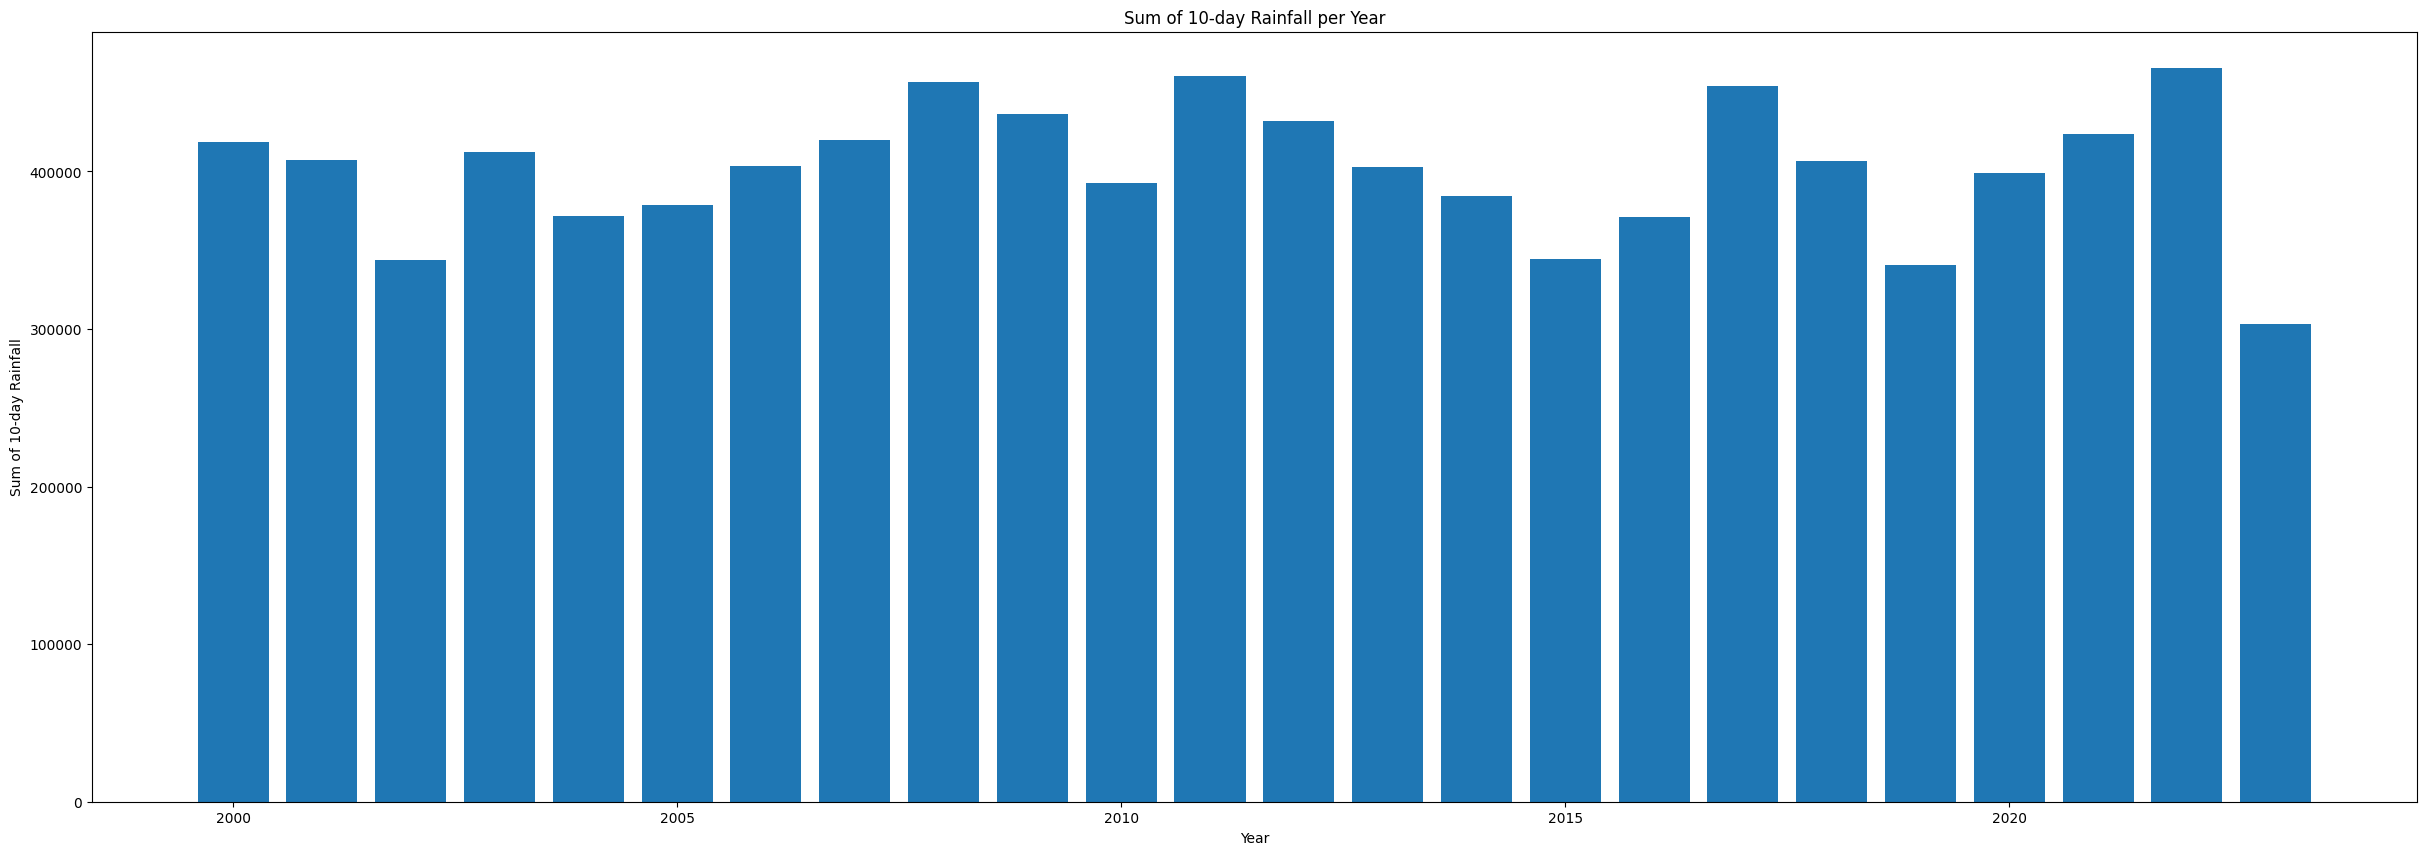

In [ ]:
df['year'] = df['date'].dt.year

# Group by year and sum the 'rfh' values
grouped_df = df.groupby('year')['rfh'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(30, 10))
plt.bar(grouped_df['year'], grouped_df['rfh'], label='', width=0.8)
plt.title('Sum of 10-day Rainfall per Year')
plt.xlabel('Year')
plt.ylabel('Sum of 10-day Rainfall')
plt.show()


In [ ]:
# Find the lowest and highest values of 'rfh'
lowest_rfh = grouped_df['rfh'].min()
highest_rfh = grouped_df['rfh'].max()

print(f"Lowest rfh: {lowest_rfh}")
print(f"Highest rfh: {highest_rfh}")

difference_rfh = highest_rfh - lowest_rfh

print(f"Difference between highest and lowest rfh: {difference_rfh}")

Lowest rfh: 302884.2284
Highest rfh: 465415.557
Difference between highest and lowest rfh: 162531.32859999995


#### 2. Is there a correlation between the 10-day rainfall and the long-term average

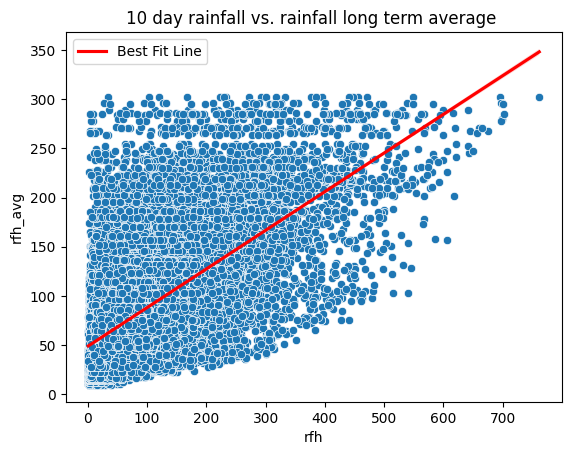

In [ ]:
ax = sns.scatterplot(x="rfh", y="rfh_avg", data=df);
ax.set_title("10 day rainfall vs. rainfall long term average ")
ax.set_xlabel("10 day rainfall[mm]");
ax.set_ylabel("rainfall long term average [mm] ");
sns.regplot(x="rfh", y="rfh_avg", data=df, scatter=False, color='red', label='Best Fit Line')

# Show the plot
plt.legend()
plt.show()

In [ ]:
from scipy import stats
stats.pearsonr(df['rfh'], df['rfh_avg'])

PearsonRResult(statistic=0.6325538149963734, pvalue=0.0)

#### 3. How does the average rainfall anomaly (rfq) vary across subnational units over the past time?

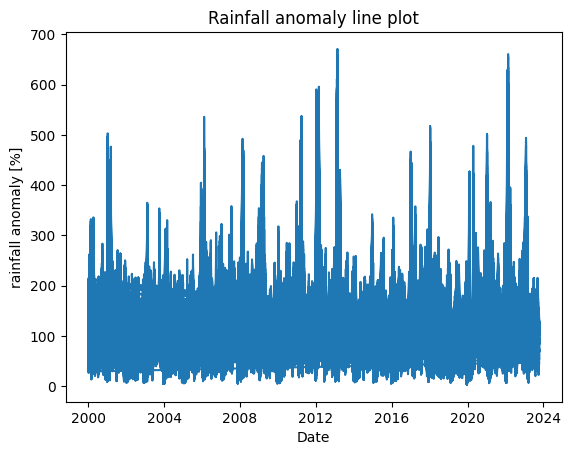

In [ ]:
plt.plot(df['date'], df['rfq'], label='rainfall anomaly [%]')
plt.title('Rainfall anomaly line plot')
plt.xlabel('Date')
plt.ylabel('rainfall anomaly [%]')
plt.show()

4. Show the highest average anomaly (rfq) for every year

In [ ]:
# Extract the year from the date
df['year'] = df['date'].dt.year

# Find the row with the highest rfq for each year
highest_rfq_per_year = df.loc[df.groupby('year')['rfq'].idxmax()]

# Display the resulting table
print(highest_rfq_per_year[['year', 'date', 'rfq']])


        year       date       rfq
151713  2000 2000-04-11  336.0248
174855  2001 2001-01-11  503.1792
34670   2002 2002-04-21  223.8128
68601   2003 2003-02-11  365.1376
90213   2004 2004-03-01  330.5318
142671  2005 2005-12-11  404.9676
67168   2006 2006-02-11  535.9417
50269   2007 2007-07-21  358.4241
198226  2008 2008-02-21  492.3004
152036  2009 2009-04-01  458.1712
27243   2010 2010-01-11  318.2080
14959   2011 2011-04-01  537.7854
142895  2012 2012-03-01  595.8635
176832  2013 2013-02-21  670.9658
112176  2014 2014-12-21  342.1599
119903  2015 2015-08-01  295.6677
65986   2016 2016-02-01  335.5091
195463  2017 2017-01-01  466.8575
195500  2018 2018-01-11  517.9466
155469  2019 2019-01-01  272.1349
195582  2020 2020-04-21  478.1613
127804  2021 2021-01-11  502.1359
67745   2022 2022-02-21  660.6945
110927  2023 2023-02-01  494.1312


<ipython-input-37-3f88a6617b4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


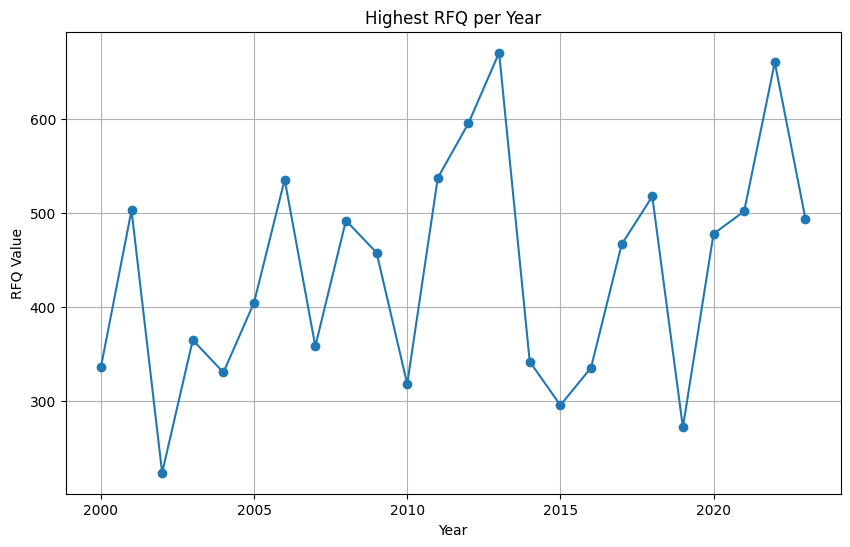

In [ ]:
highest_rfq_per_year_sorted = highest_rfq_per_year.sort_values('year')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(highest_rfq_per_year_sorted['year'], highest_rfq_per_year_sorted['rfq'], marker='o', linestyle='-')
plt.title('Highest RFQ per Year')
plt.xlabel('Year')
plt.ylabel('RFQ Value')
plt.grid(True)
plt.show()

#### 5. Which date have the highest 1-month rolling aggregation (r1h) of rainfall?

In [ ]:
# Find the date with the highest 1-month rolling aggregation
max_date = df.loc[df['r1h'].idxmax(), 'date']

print(f"The date with the highest 1-month rolling aggregation is: {max_date}")


The date with the highest 1-month rolling aggregation is: 2008-12-01 00:00:00


#### 6. What are the trends in the 1-month and 3-month rolling aggregations (r1h and r3h) over time?

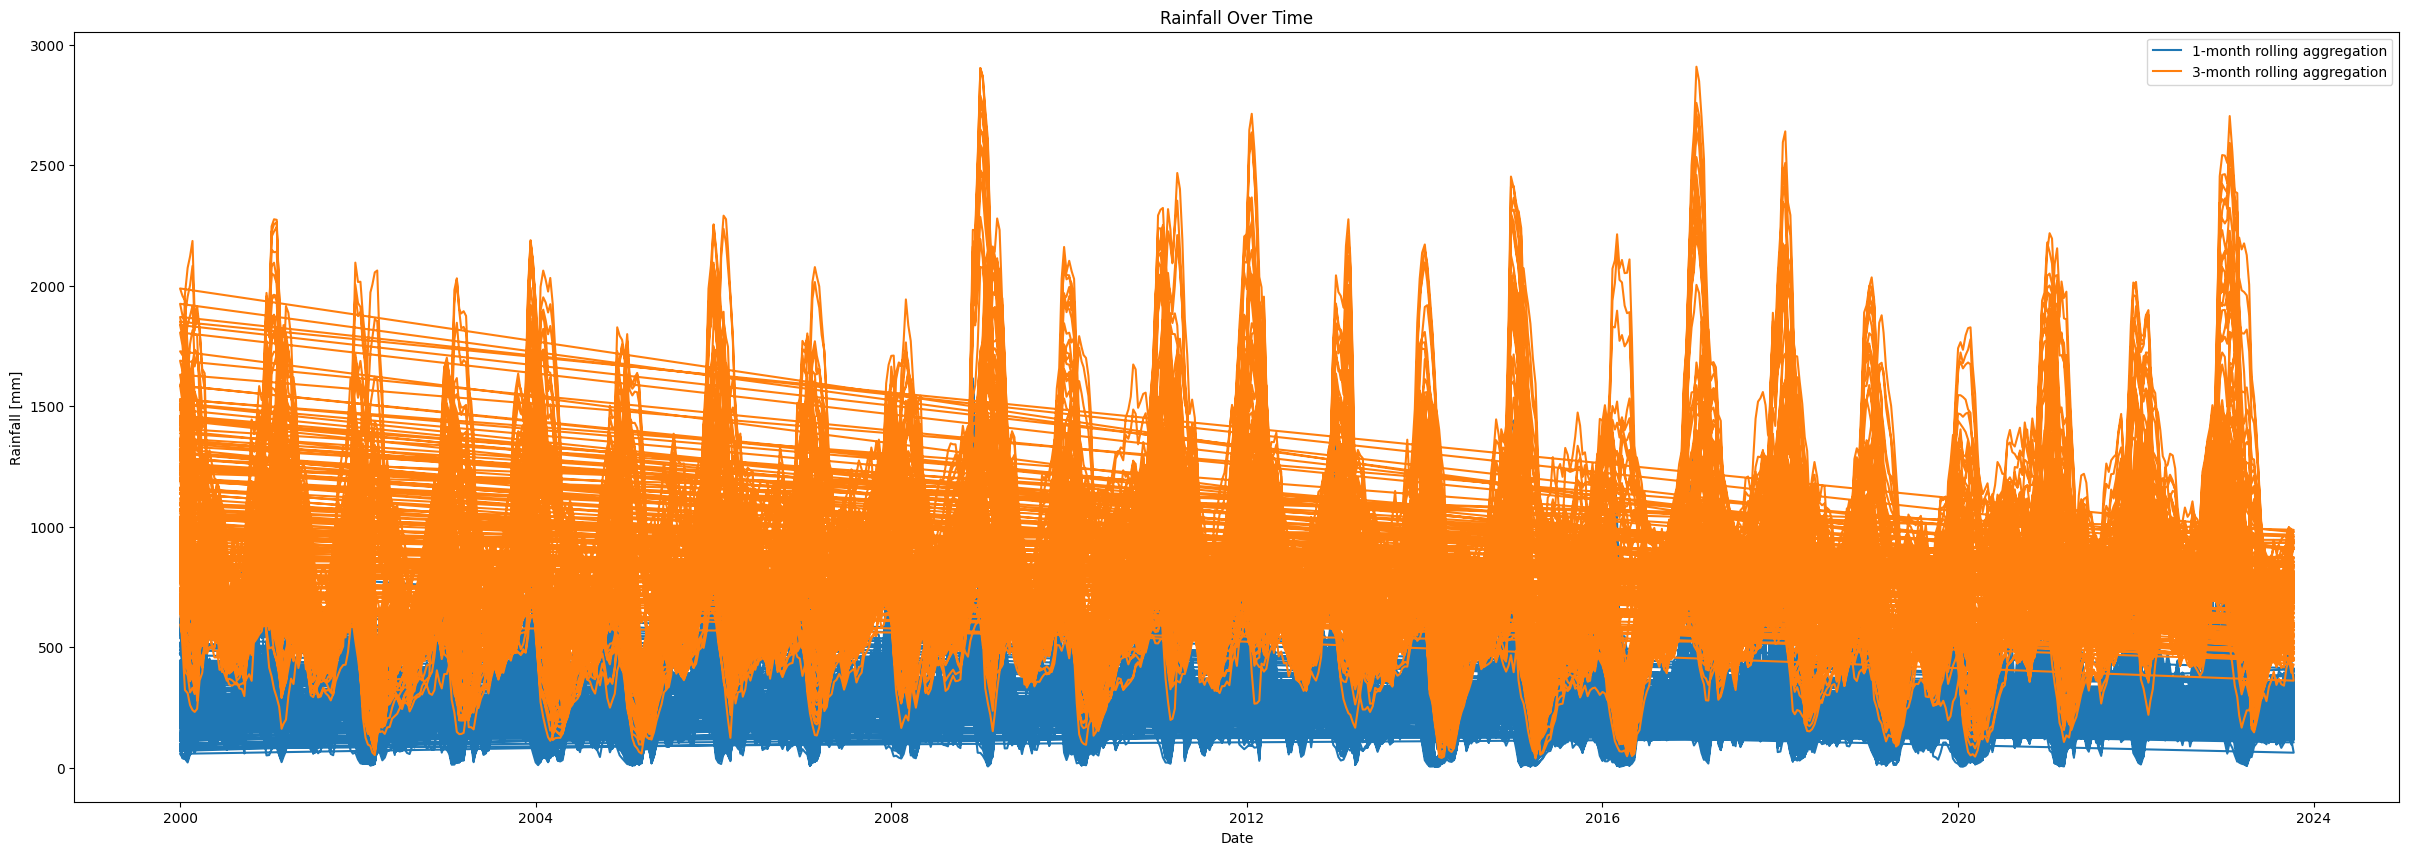

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(df['date'], df['r1h'], label='1-month rolling aggregation')
plt.plot(df['date'], df['r3h'], label='3-month rolling aggregation')
plt.legend()
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall [mm]')
plt.show()

#### 7. What is the overall trend of 3-month rolling aggregation anomalies (r3q) in Malaysia?

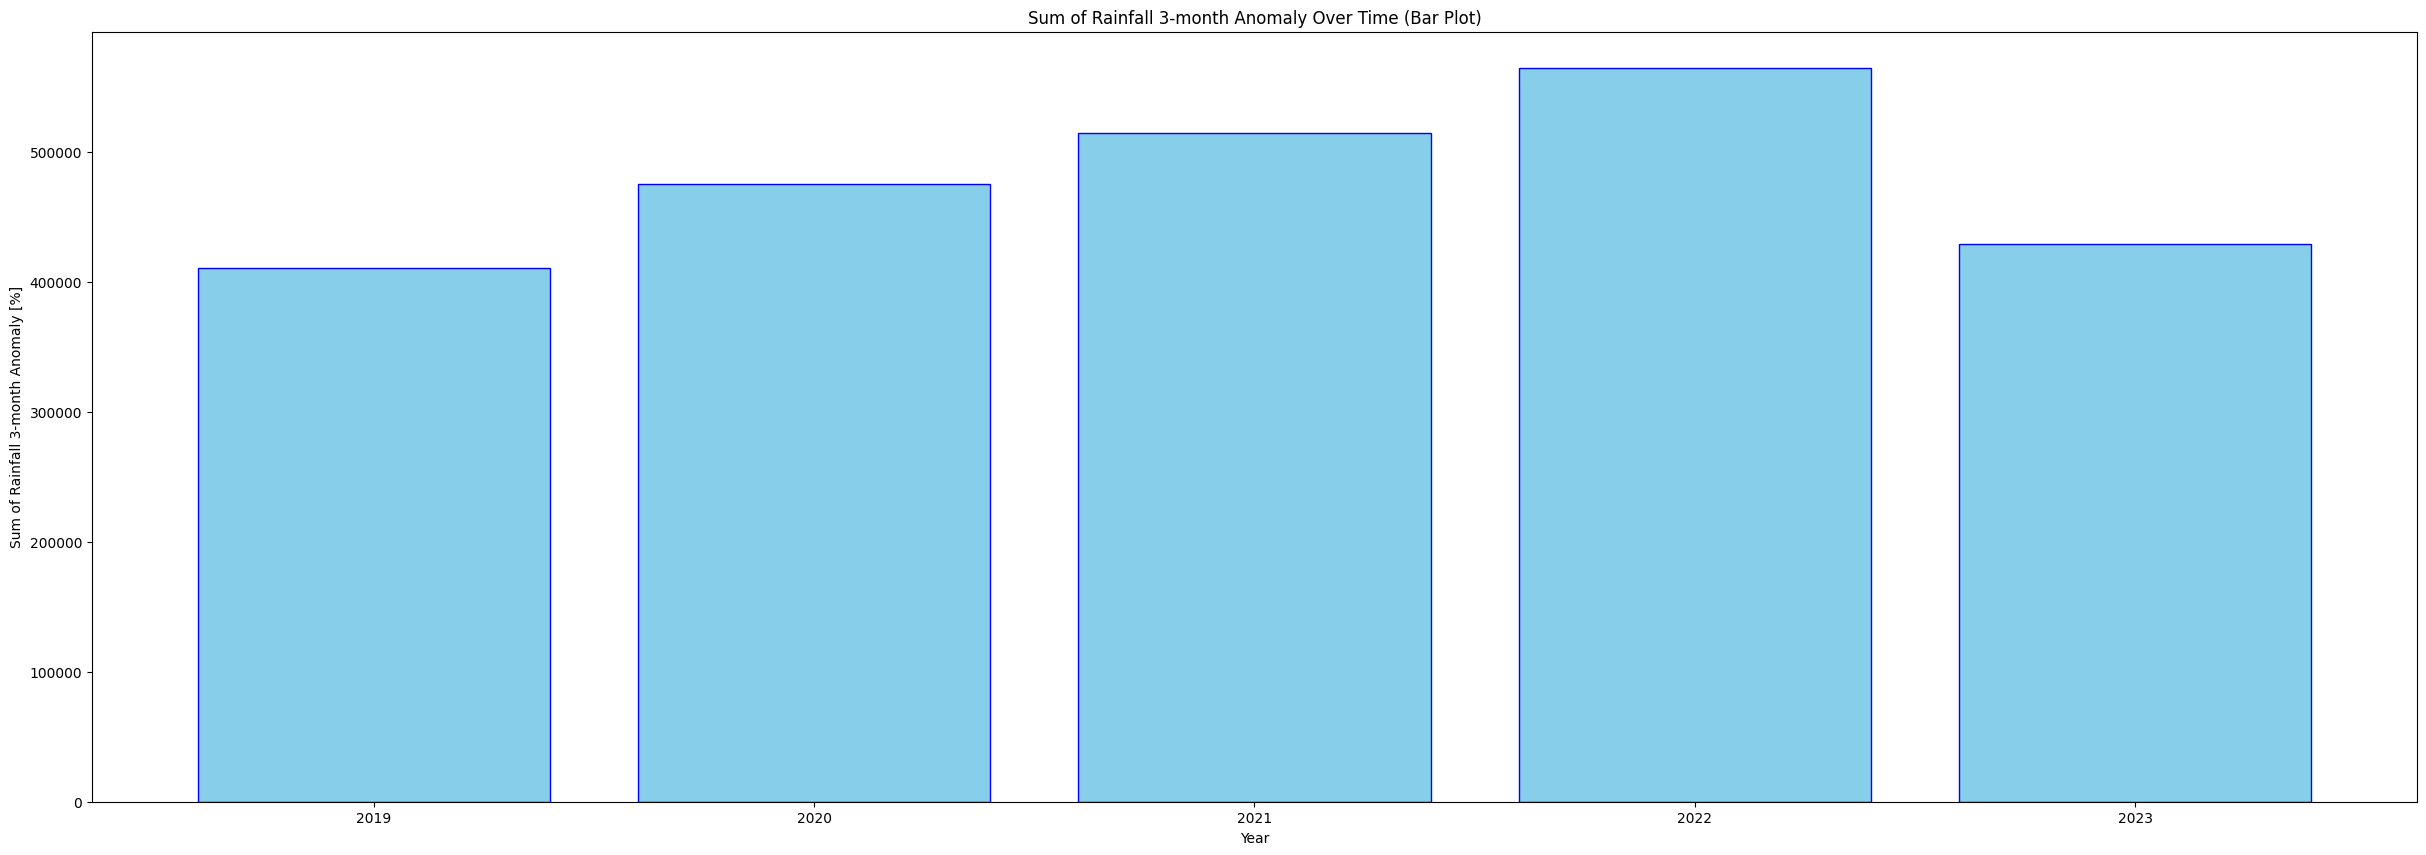

In [ ]:
filtered_df = df[df['date'].dt.year >= 2019]

grouped_filtered_df = filtered_df.groupby(filtered_df['date'].dt.year)['r3q'].sum().reset_index()

plt.figure(figsize=(30, 10))
plt.bar(grouped_filtered_df['date'], grouped_filtered_df['r3q'], color='skyblue', edgecolor='blue')
plt.title('Sum of Rainfall 3-month Anomaly Over Time (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Sum of Rainfall 3-month Anomaly [%]')
plt.show()


#### 8. Are there any outliers in the dataset regarding rainfall anomalies(rfq, r1q, r3q)?

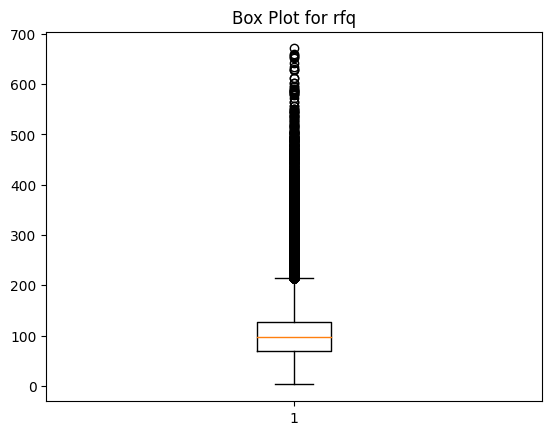

In [ ]:
rfq_values = df2['rfq']
plt.boxplot(rfq_values)
plt.title('Box Plot for rfq')
plt.show()

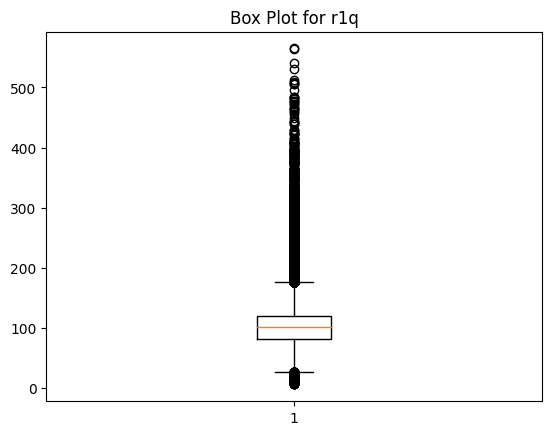

In [ ]:
rfq_values = df2['r1q']
plt.boxplot(rfq_values)
plt.title('Box Plot for r1q')
plt.show()

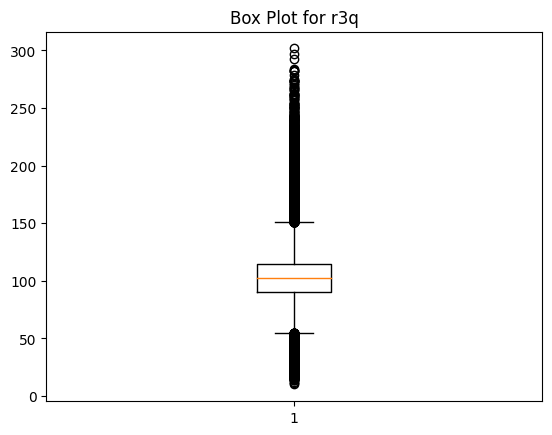

In [ ]:
rfq_values = df2['r3q']
plt.boxplot(rfq_values)
plt.title('Box Plot for r3q')
plt.show()

#### 9. What is the pattern of the r3q distribution across multiple years used in the dataset?

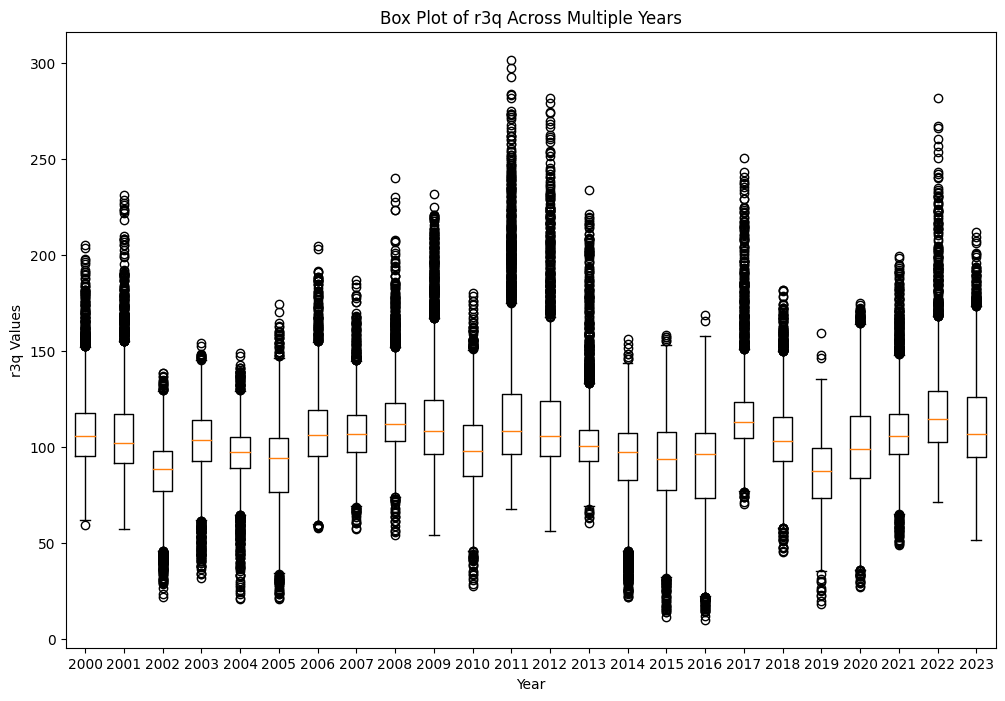

In [ ]:
# Convert 'date' to datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Extract year from the date
df2['year'] = df2['date'].dt.year

# Create a box plot for each year
plt.figure(figsize=(12, 8))
plt.boxplot([df2[df2['year'] == year]['r3q'] for year in df2['year'].unique()], labels=df2['year'].unique())
plt.title('Box Plot of r3q Across Multiple Years')
plt.xlabel('Year')
plt.ylabel('r3q Values')
plt.show()

#### 10. What are the driest and wettest dekads (10 days period) in the dataset based on the 10-day rainfall (rfh)?

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])

# Extract dekad from the date
df2['dekad'] = (df2['date'].dt.day - 1) // 10 + 1

# Find the driest and wettest dekads
driest_dekad = df2.loc[df2['rfh'].idxmin()]
wettest_dekad = df2.loc[df2['rfh'].idxmax()]

# Print the results
print("Driest Dekad:")
print(driest_dekad[['date', 'rfh']])
print("\nWettest Dekad:")
print(wettest_dekad[['date', 'rfh']])

Driest Dekad:
date    2002-01-11 00:00:00
rfh                     1.0
Name: 66062, dtype: object

Wettest Dekad:
date    2001-12-11 00:00:00
rfh                761.4914
Name: 36064, dtype: object


### Summarize inferences & conclusion

Inferences from dataset
- **Question 1**

The bar chart show the sum of 10-day Rainfall per Year which the 10-day rainfall we sum it by year. We can see that the highest and lowest 10-day rainfall that make difference 162531.33. This difference is quite worry for the Malaysia goverment to make sure all the country to operate efficiently. Malaysia goverment need to prepare enough water supply to prevent the worst case happen in future to make sure the country can operate efficiently.

- **Question 2**

Correlation between the 10-day rainfall and the long-term average is 0.63 which show that it is positive correlation. It show when that 10-day rainfall increase then long-term average also increase. This information is valuable when we want to see the pattern of rainfall in short terms and long terms for the indsustry such as agriculture.  

- **Question 3**

Average rainfall anomaly (rfq) vary across subnational units over the past time graph show it have vary pattern that keep increase and decrease for certain period. Industry in Malaysia need to be aware all time as the pattern keep showing increase and decrease pattern Average rainfall anomaly that might affect their industry in future.

- **Question 4**

Based on the analysis, we can see the highest average anomaly for every year based on the date. This show that Malaysia goverment can take note the possible occurence of rainfall in the future to notify their Malaysian citizen to always be aware of this posibility in future.

- **Question 5**

The highest of highest 1-month rolling aggregation (r1h) of rainfall happen in 2008-12-01 which is 15 years ago. This can ease the industry especially agriculture to plant their crops without need to worry for fload to happen in short term period.

- **Question 6**

The graph show the scatter plot is vary from the year 2000 until 2023 based on 1-month rolling aggregation and 3-month rolling aggregation. The graph show inconsistent trend as it increase and decrease for certain period. Examining the times when these changes occur may help us understand why the rainfall patterns are shifting. These trends could be influenced by natural climate patterns or external factors.

- **Question 7**

We can see the pattern increasing but when it come to 2023 it decrease based on sum of Rainfall 3-month Anomaly for the past 5 year. This unexpected shift requires further investigation to understand the change. We can take consideration based on some factor such as climate events that have high posibility to the change of the pattern.

- **Question 8**

there are increased amount of rains within 1 month period than normal (outliers in r1q) and normal cumulative rainfall over th3 months (outliers in r3q)

- **Question 9**

Over the period from 2000 to 2023, there are systematic pattern of higher-than-expected 3 months rainfall anomalies.

- **Question 10**

The analysis show that the driest Dekad happen in 2002 and the wettest Dekad happen in 2001. We can make analysis that the situtation have lowest posibility to happen in the future as it happen aboiut 22 years ago. This can ease all industry espesicially in agriculture that need water for their crops.

conlusion

In the nutshell, we can conclude from all the visualization that the rainfall in Malaysia vary every year, month and day that all Malaysian Citizenship need to aware for this case study as the worst case might happen in the future. Malaysia goverment can make preparation for the worst case such as flood drought to make sure all citizen does not suffer in future from the climate change. We hope from this case study, it can give a valuable analysis to all Malaysian.


References
1. https://sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html
2. https://www.geeksforgeeks.org/introduction-to-seaborn-python/